# Sentiment Analysis project<a href="#Sentiment-Analysis-project" class="anchor-link">¶</a>

## Dataset (SMS Spam Collection Dataset)<a href="#Dataset-(SMS-Spam-Collection-Dataset)"
class="anchor-link">¶</a>

The dataset link:
<https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset?resource=download>

### Abstract:<a href="#Abstract:" class="anchor-link">¶</a>

In this sentiment analysis project, we aimed to classify SMS messages as
either spam or ham (non-spam). Our project followed a structured
outline, which included data cleaning, exploratory data analysis (EDA),
text preprocessing, model building, and evaluation.


### The Outline:<a href="#The-Outline:" class="anchor-link">¶</a>

-   Data cleaning
-   EDA
-   Text Preprocessing
-   Model building
-   Evaluation

In \[406\]:

    # importing libraries
    import pandas as pd
    import numpy as np
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.model_selection import train_test_split
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.metrics import classification_report
    from sklearn.metrics import classification_report, roc_auc_score

In \[407\]:

    # importing the dataset
    data = pd.read_csv("spam.csv", encoding = 'latin-1')

In \[408\]:

    data.head()

Out\[408\]:

|     | v1   | v2                                                | Unnamed: 2 | Unnamed: 3 | Unnamed: 4 |
|-----|------|---------------------------------------------------|------------|------------|------------|
| 0   | ham  | Go until jurong point, crazy.. Available only ... | NaN        | NaN        | NaN        |
| 1   | ham  | Ok lar... Joking wif u oni...                     | NaN        | NaN        | NaN        |
| 2   | spam | Free entry in 2 a wkly comp to win FA Cup fina... | NaN        | NaN        | NaN        |
| 3   | ham  | U dun say so early hor... U c already then say... | NaN        | NaN        | NaN        |
| 4   | ham  | Nah I don't think he goes to usf, he lives aro... | NaN        | NaN        | NaN        |

In \[409\]:

    data.shape

Out\[409\]:

    (5572, 5)

# 1. Data Cleaning<a href="#1.-Data-Cleaning" class="anchor-link">¶</a>

In \[410\]:

    data.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 5572 entries, 0 to 5571
    Data columns (total 5 columns):
     #   Column      Non-Null Count  Dtype 
    ---  ------      --------------  ----- 
     0   v1          5572 non-null   object
     1   v2          5572 non-null   object
     2   Unnamed: 2  50 non-null     object
     3   Unnamed: 3  12 non-null     object
     4   Unnamed: 4  6 non-null      object
    dtypes: object(5)
    memory usage: 217.8+ KB

In \[411\]:

    # drop last 3 cols
    data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In \[412\]:

    data.sample(5)

Out\[412\]:

|      | v1   | v2                                                |
|------|------|---------------------------------------------------|
| 557  | ham  | I know that my friend already told that.          |
| 1326 | ham  | Sorry, was in the bathroom, sup                   |
| 5386 | ham  | I'm at work. Please call                          |
| 232  | ham  | Sorry battery died, yeah I'm here                 |
| 5237 | spam | Someonone you know is trying to contact you vi... |

In \[413\]:

    # renaming the cols
    data.rename(columns={'v1':'target','v2':'Messages'},inplace=True)
    data.sample(5)

Out\[413\]:

|      | target | Messages                                          |
|------|--------|---------------------------------------------------|
| 287  | ham    | hi baby im cruisin with my girl friend what r ... |
| 885  | ham    | Gibbs unsold.mike hussey                          |
| 3394 | ham    | Then i buy.                                       |
| 3235 | ham    | Aight text me when you're back at mu and I'll ... |
| 2413 | ham    | Lol please do. Actually send a pic of yourself... |

In \[414\]:

    from sklearn.preprocessing import LabelEncoder
    encoder = LabelEncoder()
    data['target'] = encoder.fit_transform(data['target'])
    data.head()

Out\[414\]:

|     | target | Messages                                          |
|-----|--------|---------------------------------------------------|
| 0   | 0      | Go until jurong point, crazy.. Available only ... |
| 1   | 0      | Ok lar... Joking wif u oni...                     |
| 2   | 1      | Free entry in 2 a wkly comp to win FA Cup fina... |
| 3   | 0      | U dun say so early hor... U c already then say... |
| 4   | 0      | Nah I don't think he goes to usf, he lives aro... |

In \[415\]:

    # missing values
    data.isnull().sum()

Out\[415\]:

    target      0
    Messages    0
    dtype: int64

In \[416\]:

    # check for duplicate values
    data.duplicated().sum()

Out\[416\]:

    403

In \[417\]:

    # remove duplicates
    data = data.drop_duplicates(keep='first')

In \[418\]:

    data.duplicated().sum()

Out\[418\]:

    0

In \[419\]:

    data.shape

Out\[419\]:

    (5169, 2)

# 2. EDA<a href="#2.-EDA" class="anchor-link">¶</a>

In \[420\]:

    data.head()

Out\[420\]:

|     | target | Messages                                          |
|-----|--------|---------------------------------------------------|
| 0   | 0      | Go until jurong point, crazy.. Available only ... |
| 1   | 0      | Ok lar... Joking wif u oni...                     |
| 2   | 1      | Free entry in 2 a wkly comp to win FA Cup fina... |
| 3   | 0      | U dun say so early hor... U c already then say... |
| 4   | 0      | Nah I don't think he goes to usf, he lives aro... |

In \[421\]:

    # Count the occurrences of each unique value in the 'target' column
    data['target'].value_counts()

Out\[421\]:

    0    4516
    1     653
    Name: target, dtype: int64

In \[422\]:

    data['target'].value_counts().plot(kind = 'bar')
    plt.title('Count of each Target Value')

Out\[422\]:

    Text(0.5, 1.0, 'Count of each Target Value')

![](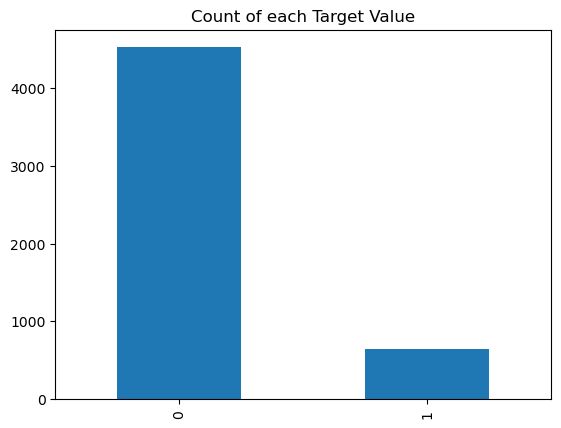%0A)

In \[423\]:

    import matplotlib.pyplot as plt
    plt.pie(data['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
    plt.show()

![](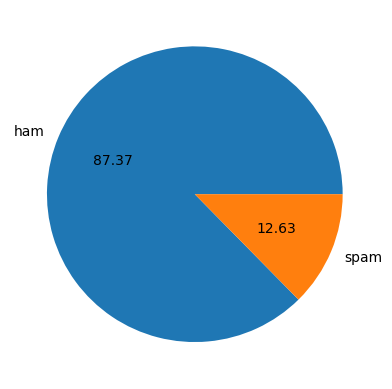%0A)

Data is imbalanced!!

In \[424\]:

    import nltk
    nltk.download('punkt')

    [nltk_data] Downloading package punkt to
    [nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
    [nltk_data]   Package punkt is already up-to-date!

Out\[424\]:

    True

In \[425\]:

    data['num_characters'] = data['Messages'].apply(len)

In \[426\]:

    data.head()

Out\[426\]:

|     | target | Messages                                          | num_characters |
|-----|--------|---------------------------------------------------|----------------|
| 0   | 0      | Go until jurong point, crazy.. Available only ... | 111            |
| 1   | 0      | Ok lar... Joking wif u oni...                     | 29             |
| 2   | 1      | Free entry in 2 a wkly comp to win FA Cup fina... | 155            |
| 3   | 0      | U dun say so early hor... U c already then say... | 49             |
| 4   | 0      | Nah I don't think he goes to usf, he lives aro... | 61             |

In \[427\]:

    # num of words
    data['num_words'] = data['Messages'].apply(lambda x:len(nltk.word_tokenize(x)))

In \[428\]:

    data.head()

Out\[428\]:

|     | target | Messages                                          | num_characters | num_words |
|-----|--------|---------------------------------------------------|----------------|-----------|
| 0   | 0      | Go until jurong point, crazy.. Available only ... | 111            | 24        |
| 1   | 0      | Ok lar... Joking wif u oni...                     | 29             | 8         |
| 2   | 1      | Free entry in 2 a wkly comp to win FA Cup fina... | 155            | 37        |
| 3   | 0      | U dun say so early hor... U c already then say... | 49             | 13        |
| 4   | 0      | Nah I don't think he goes to usf, he lives aro... | 61             | 15        |

In \[429\]:

    data['num_sentences'] = data['Messages'].apply(lambda x:len(nltk.sent_tokenize(x)))

In \[430\]:

    data.head()

Out\[430\]:

|     | target | Messages                                          | num_characters | num_words | num_sentences |
|-----|--------|---------------------------------------------------|----------------|-----------|---------------|
| 0   | 0      | Go until jurong point, crazy.. Available only ... | 111            | 24        | 2             |
| 1   | 0      | Ok lar... Joking wif u oni...                     | 29             | 8         | 2             |
| 2   | 1      | Free entry in 2 a wkly comp to win FA Cup fina... | 155            | 37        | 2             |
| 3   | 0      | U dun say so early hor... U c already then say... | 49             | 13        | 1             |
| 4   | 0      | Nah I don't think he goes to usf, he lives aro... | 61             | 15        | 1             |

In \[431\]:

    data[['num_characters','num_words','num_sentences']].describe()

Out\[431\]:

|       | num_characters | num_words   | num_sentences |
|-------|----------------|-------------|---------------|
| count | 5169.000000    | 5169.000000 | 5169.000000   |
| mean  | 78.977945      | 18.453279   | 1.947185      |
| std   | 58.236293      | 13.324793   | 1.362406      |
| min   | 2.000000       | 1.000000    | 1.000000      |
| 25%   | 36.000000      | 9.000000    | 1.000000      |
| 50%   | 60.000000      | 15.000000   | 1.000000      |
| 75%   | 117.000000     | 26.000000   | 2.000000      |
| max   | 910.000000     | 220.000000  | 28.000000     |

In \[432\]:

    # ham
    data[data['target'] == 0][['num_characters','num_words','num_sentences']].describe()

Out\[432\]:

|       | num_characters | num_words   | num_sentences |
|-------|----------------|-------------|---------------|
| count | 4516.000000    | 4516.000000 | 4516.000000   |
| mean  | 70.459256      | 17.120903   | 1.799601      |
| std   | 56.358207      | 13.493725   | 1.278465      |
| min   | 2.000000       | 1.000000    | 1.000000      |
| 25%   | 34.000000      | 8.000000    | 1.000000      |
| 50%   | 52.000000      | 13.000000   | 1.000000      |
| 75%   | 90.000000      | 22.000000   | 2.000000      |
| max   | 910.000000     | 220.000000  | 28.000000     |

In \[433\]:

    #spam
    data[data['target'] == 1][['num_characters','num_words','num_sentences']].describe()

Out\[433\]:

|       | num_characters | num_words  | num_sentences |
|-------|----------------|------------|---------------|
| count | 653.000000     | 653.000000 | 653.000000    |
| mean  | 137.891271     | 27.667688  | 2.967841      |
| std   | 30.137753      | 7.008418   | 1.483201      |
| min   | 13.000000      | 2.000000   | 1.000000      |
| 25%   | 132.000000     | 25.000000  | 2.000000      |
| 50%   | 149.000000     | 29.000000  | 3.000000      |
| 75%   | 157.000000     | 32.000000  | 4.000000      |
| max   | 224.000000     | 46.000000  | 8.000000      |

In \[434\]:

    import seaborn as sns
    plt.figure(figsize=(12,6))
    sns.histplot(data[data['target'] == 0]['num_characters'])
    sns.histplot(data[data['target'] == 1]['num_characters'],color='red')

Out\[434\]:

    <Axes: xlabel='num_characters', ylabel='Count'>

![](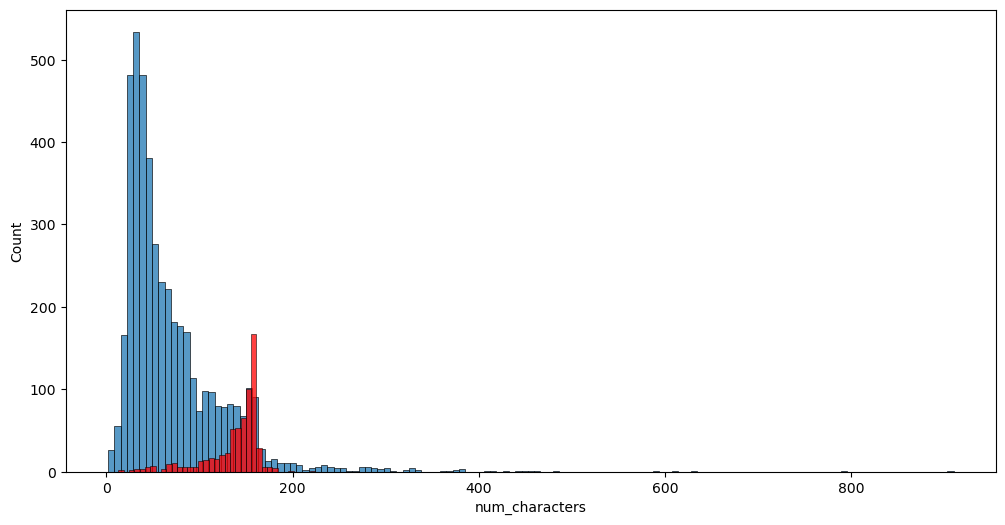%0A)

In \[435\]:

    plt.figure(figsize=(12,6))
    sns.histplot(data[data['target'] == 0]['num_words'])
    sns.histplot(data[data['target'] == 1]['num_words'],color='red')

Out\[435\]:

    <Axes: xlabel='num_words', ylabel='Count'>

![](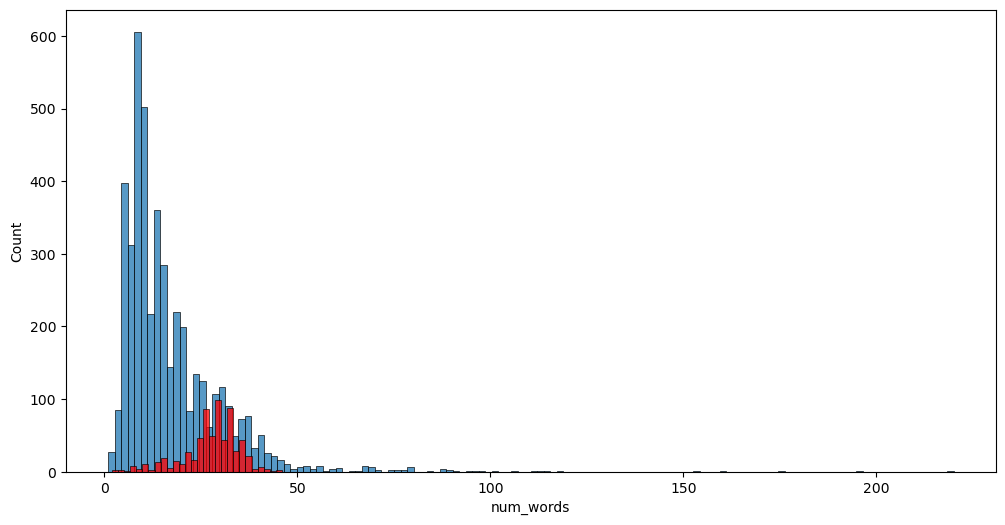%0A)

In \[436\]:

    sns.pairplot(data,hue='target')

Out\[436\]:

    <seaborn.axisgrid.PairGrid at 0x2000b666d40>

![](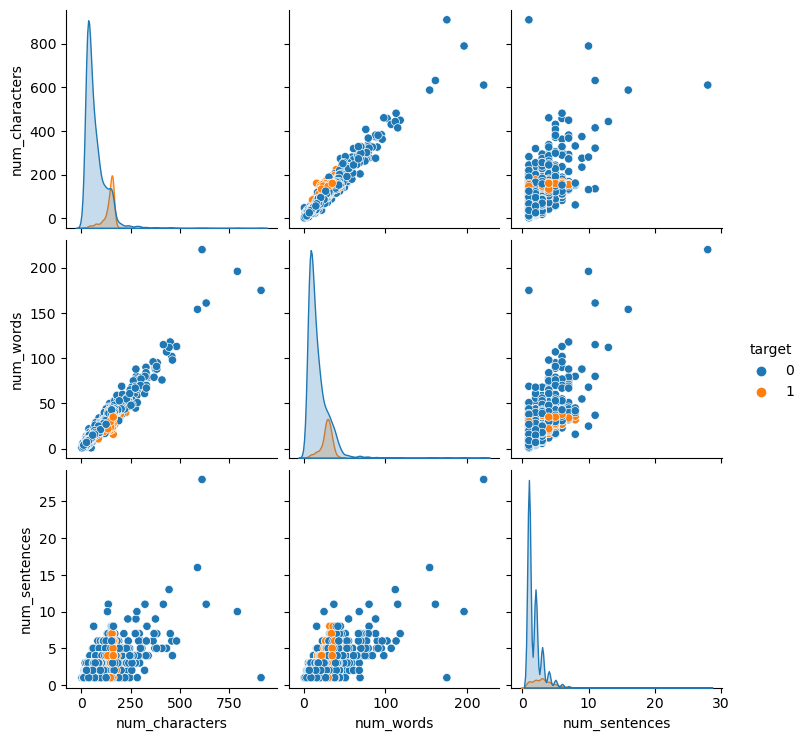%0A)

In \[437\]:

    sns.heatmap(data.corr(),annot=True)

    C:\Users\lenovo\AppData\Local\Temp\ipykernel_9796\2578434383.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
      sns.heatmap(data.corr(),annot=True)

Out\[437\]:

    <Axes: >

![](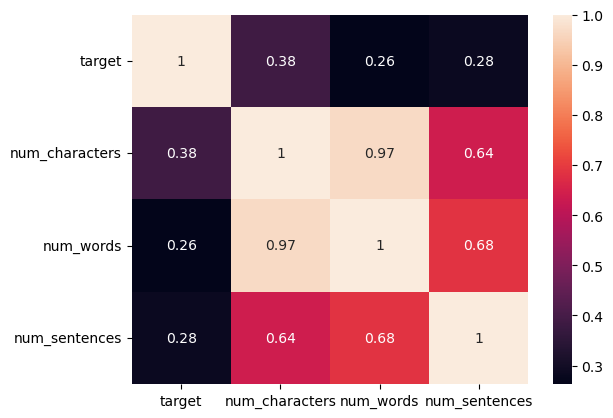%0A)

# 3.Data Preprocessing<a href="#3.Data-Preprocessing" class="anchor-link">¶</a>

-   Lower case
-   Tokenization
-   Removing special characters
-   Removing stop words and punctuation
-   Stemming

In \[438\]:

    from nltk.corpus import stopwords
    from nltk.stem import PorterStemmer
    import string

    def transform_text(Messages):
        Messages = Messages.lower()
        Messages = nltk.word_tokenize(Messages)
        
        y = []
        for i in Messages:
            if i.isalnum():
                y.append(i)
        
        Messages = y[:]
        y.clear()
        
        for i in Messages:
            if i not in stopwords.words('english') and i not in string.punctuation:
                y.append(i)
                
        Messages = y[:]
        y.clear()
        
        ps = PorterStemmer()
        for i in Messages:
            y.append(ps.stem(i))
        
        return " ".join(y)

In \[439\]:

    data['transform_text'] = data['Messages'].apply(transform_text)

In \[440\]:

    data.head()

Out\[440\]:

|     | target | Messages                                          | num_characters | num_words | num_sentences | transform_text                                    |
|-----|--------|---------------------------------------------------|----------------|-----------|---------------|---------------------------------------------------|
| 0   | 0      | Go until jurong point, crazy.. Available only ... | 111            | 24        | 2             | go jurong point crazi avail bugi n great world... |
| 1   | 0      | Ok lar... Joking wif u oni...                     | 29             | 8         | 2             | ok lar joke wif u oni                             |
| 2   | 1      | Free entry in 2 a wkly comp to win FA Cup fina... | 155            | 37        | 2             | free entri 2 wkli comp win fa cup final tkt 21... |
| 3   | 0      | U dun say so early hor... U c already then say... | 49             | 13        | 1             | u dun say earli hor u c alreadi say               |
| 4   | 0      | Nah I don't think he goes to usf, he lives aro... | 61             | 15        | 1             | nah think goe usf live around though              |

In \[441\]:

    from wordcloud import WordCloud
    wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In \[442\]:

    spam_wc = wc.generate(data[data['target'] == 1]['transform_text'].str.cat(sep=" "))
    plt.figure(figsize=(15,6))
    plt.imshow(spam_wc)

Out\[442\]:

    <matplotlib.image.AxesImage at 0x2000ae3e0b0>

![](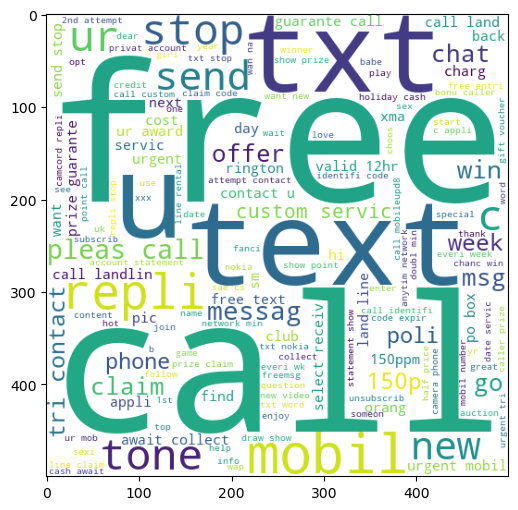%0A)

In \[443\]:

    ham_wc = wc.generate(data[data['target'] == 0]['transform_text'].str.cat(sep=" "))
    plt.figure(figsize=(15,6))
    plt.imshow(ham_wc)

Out\[443\]:

    <matplotlib.image.AxesImage at 0x2002906bb50>

![](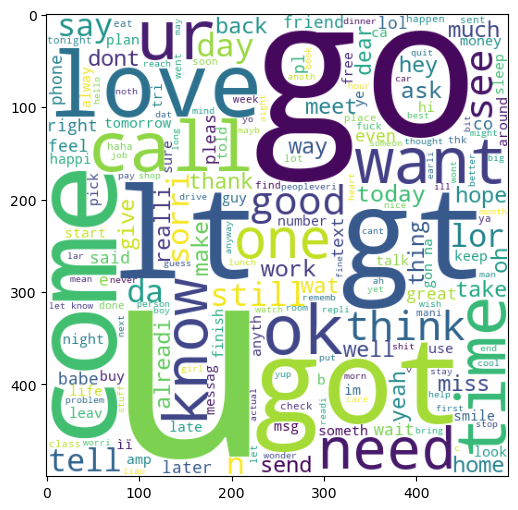%0A)

In \[444\]:

    data.head()

Out\[444\]:

|     | target | Messages                                          | num_characters | num_words | num_sentences | transform_text                                    |
|-----|--------|---------------------------------------------------|----------------|-----------|---------------|---------------------------------------------------|
| 0   | 0      | Go until jurong point, crazy.. Available only ... | 111            | 24        | 2             | go jurong point crazi avail bugi n great world... |
| 1   | 0      | Ok lar... Joking wif u oni...                     | 29             | 8         | 2             | ok lar joke wif u oni                             |
| 2   | 1      | Free entry in 2 a wkly comp to win FA Cup fina... | 155            | 37        | 2             | free entri 2 wkli comp win fa cup final tkt 21... |
| 3   | 0      | U dun say so early hor... U c already then say... | 49             | 13        | 1             | u dun say earli hor u c alreadi say               |
| 4   | 0      | Nah I don't think he goes to usf, he lives aro... | 61             | 15        | 1             | nah think goe usf live around though              |

In \[445\]:

    spam_corpus = []
    ham_corpus = []

    # Iterate over each row in the dataframe
    for index, row in data.iterrows():
        text = row['transform_text']  
        target = row['target']  
        
        # Split the text into words and append to the corresponding corpus
        if target == 0:  # Spam
            spam_corpus.extend(text.split())
        elif target == 1:  # Ham
            ham_corpus.extend(text.split())

    # Print the lengths of the corpora
    print("Spam Corpus Length:", len(spam_corpus))
    print("Ham Corpus Length:", len(ham_corpus))

    Spam Corpus Length: 35394
    Ham Corpus Length: 9939

In \[446\]:

    df = pd.DataFrame(Counter(ham_corpus).most_common(30))
    sns.barplot(x=df[0], y=df[1])
    plt.xticks(rotation='vertical')
    plt.show()

![](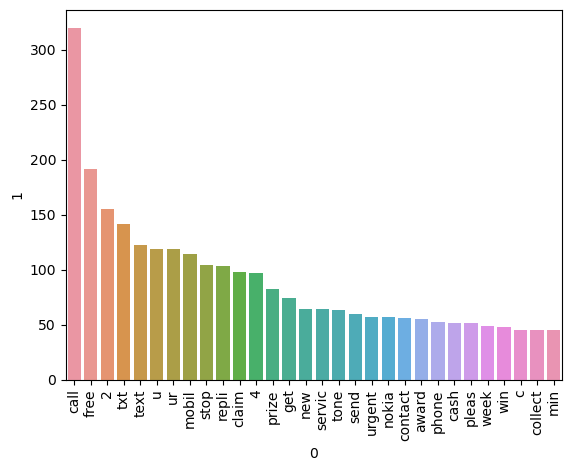%0A)

In \[447\]:

    df = pd.DataFrame(Counter(spam_corpus).most_common(30))
    sns.barplot(x=df[0], y=df[1])
    plt.xticks(rotation='vertical')
    plt.show()

![](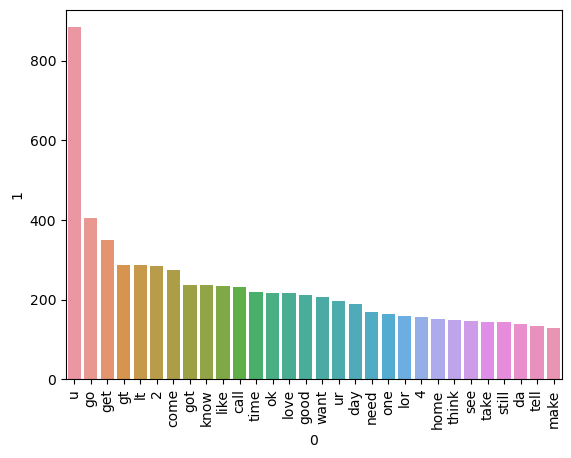%0A)

# 4. Model Building<a href="#4.-Model-Building" class="anchor-link">¶</a>

In \[448\]:

    data.shape

Out\[448\]:

    (5169, 6)

In \[449\]:

    data['target'].value_counts()

Out\[449\]:

    0    4516
    1     653
    Name: target, dtype: int64

### a) Multinomial Naive Bayes Algorithm<a href="#a)-Multinomial-Naive-Bayes-Algorithm"
class="anchor-link">¶</a>

In \[450\]:

    from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import classification_report, roc_auc_score
    from imblearn.over_sampling import RandomOverSampler

    # Load the data into x and y variables
    x = np.array(data["Messages"])
    y = data['target'].values

    # Vectorize the text data
    tfidf = TfidfVectorizer(max_features=3000)
    X = tfidf.fit_transform(data['transform_text']).toarray()

    # Resample the data using RandomOverSampler
    ros = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = ros.fit_resample(X, y)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

    # Define the classifier
    clf = MultinomialNB()

    # Train the classifier on the training data
    clf.fit(X_train, y_train)

    # Evaluate the classifier on the testing data
    y_pred = clf.predict(X_test)
    print(classification_report(y_test, y_pred))
    print('AUC-ROC:', roc_auc_score(y_test, y_pred))

                  precision    recall  f1-score   support

               0       0.96      0.97      0.97       884
               1       0.97      0.96      0.97       923

        accuracy                           0.97      1807
       macro avg       0.97      0.97      0.97      1807
    weighted avg       0.97      0.97      0.97      1807

    AUC-ROC: 0.9663103052705372

In \[451\]:

    clf.score(X_test,y_test)

Out\[451\]:

    0.9662423907028224

### b) Support Vector Machine (SVM) Algorithm<a href="#b)-Support-Vector-Machine-(SVM)-Algorithm"
class="anchor-link">¶</a>

In \[452\]:

    from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
    from sklearn.svm import SVC
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import classification_report, roc_auc_score
    from imblearn.over_sampling import RandomOverSampler

    # Load the data into x and y variables
    x = np.array(data["Messages"])
    y = data['target'].values

    # Vectorize the text data
    cv = CountVectorizer()

    # Resample the data using RandomOverSampler
    ros = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = ros.fit_resample(X, y)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

    # Define the classifier
    clf = SVC()

    # Train the classifier on the training data
    clf.fit(X_train, y_train)

    # Evaluate the classifier on the testing data
    y_pred = clf.predict(X_test)
    print(classification_report(y_test, y_pred))
    print('AUC-ROC:', roc_auc_score(y_test, y_pred))

                  precision    recall  f1-score   support

               0       1.00      1.00      1.00       884
               1       1.00      1.00      1.00       923

        accuracy                           1.00      1807
       macro avg       1.00      1.00      1.00      1807
    weighted avg       1.00      1.00      1.00      1807

    AUC-ROC: 0.9978331527627302

In \[453\]:

    clf.score(X_test,y_test)

Out\[453\]:

    0.9977863862755949

### c) Logistic Regression Algorithm<a href="#c)-Logistic-Regression-Algorithm" class="anchor-link">¶</a>

In \[454\]:

    from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import classification_report, roc_auc_score
    from imblearn.over_sampling import RandomOverSampler

    # Load the data into x and y variables
    x = np.array(data["Messages"])
    y = data['target'].values

    # Vectorize the text data
    cv = CountVectorizer()

    # Resample the data using RandomOverSampler
    ros = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = ros.fit_resample(X, y)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

    # Define the classifier
    clf = LogisticRegression()

    # Train the classifier on the training data
    clf.fit(X_train, y_train)

    # Evaluate the classifier on the testing data
    y_pred = clf.predict(X_test)
    print(classification_report(y_test, y_pred))
    print('AUC-ROC:', roc_auc_score(y_test, y_pred))

                  precision    recall  f1-score   support

               0       0.96      0.99      0.98       884
               1       0.99      0.96      0.98       923

        accuracy                           0.98      1807
       macro avg       0.98      0.98      0.98      1807
    weighted avg       0.98      0.98      0.98      1807

    AUC-ROC: 0.9759017908355108

In \[455\]:

    clf.score(X_test,y_test)

Out\[455\]:

    0.975650249031544

### d) Decision Tree Algorithm<a href="#d)-Decision-Tree-Algorithm" class="anchor-link">¶</a>

In \[456\]:

    from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import classification_report, roc_auc_score
    from imblearn.over_sampling import RandomOverSampler

    # Load the data into x and y variables
    x = np.array(data["Messages"])
    y = data['target'].values

    # Vectorize the text data
    cv = CountVectorizer()

    # Resample the data using RandomOverSampler
    ros = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = ros.fit_resample(X, y)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

    # Define the classifier
    clf = DecisionTreeClassifier()

    # Train the classifier on the training data
    clf.fit(X_train, y_train)

    # Evaluate the classifier on the testing data
    y_pred = clf.predict(X_test)
    print(classification_report(y_test, y_pred))
    print('AUC-ROC:', roc_auc_score(y_test, y_pred))

                  precision    recall  f1-score   support

               0       1.00      0.96      0.98       884
               1       0.96      1.00      0.98       923

        accuracy                           0.98      1807
       macro avg       0.98      0.98      0.98      1807
    weighted avg       0.98      0.98      0.98      1807

    AUC-ROC: 0.9757743292333185

In \[457\]:

    clf.score(X_test,y_test)

Out\[457\]:

    0.9762036524626453

-   Compare the performance of the four models (Multinomial Naive Bayes,
    Support Vector Machine, Logistic Regression, and Decision Tree)

In \[458\]:

    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.model_selection import cross_validate
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.svm import SVC
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
    from imblearn.over_sampling import RandomOverSampler

    # Load the data into x and y variables
    x = np.array(data["Messages"])
    y = data['target'].values

    # Vectorize the text data
    tfidf = TfidfVectorizer(max_features=3000)
    X = tfidf.fit_transform(data['transform_text']).toarray()

    # Resample the data using RandomOverSampler
    ros = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = ros.fit_resample(X, y)

    # Define the models
    models = [
        ('Multinomial Naive Bayes', MultinomialNB()),
        ('Support Vector Machine', SVC()),
        ('Logistic Regression', LogisticRegression()),
        ('Decision Tree', DecisionTreeClassifier())
    ]

    # Define the evaluation metrics
    scoring = {
        'accuracy': make_scorer(accuracy_score),
        'precision': make_scorer(precision_score),
        'recall': make_scorer(recall_score),
        'f1_score': make_scorer(f1_score),
        'auc_roc': make_scorer(roc_auc_score)
    }

    # Perform cross-validation and evaluate the models
    for model_name, model in models:
        scores = cross_validate(model, X_resampled, y_resampled, cv=5, scoring=scoring)
        print(f"Model: {model_name}")
        print(f"Accuracy: {scores['test_accuracy'].mean():.4f}")
        print(f"Precision: {scores['test_precision'].mean():.4f}")
        print(f"Recall: {scores['test_recall'].mean():.4f}")
        print(f"F1-Score: {scores['test_f1_score'].mean():.4f}")
        print(f"AUC-ROC: {scores['test_auc_roc'].mean():.4f}")
        print("-" * 30)

    Model: Multinomial Naive Bayes
    Accuracy: 0.9673
    Precision: 0.9658
    Recall: 0.9690
    F1-Score: 0.9674
    AUC-ROC: 0.9673
    ------------------------------
    Model: Support Vector Machine
    Accuracy: 0.9977
    Precision: 0.9982
    Recall: 0.9971
    F1-Score: 0.9977
    AUC-ROC: 0.9977
    ------------------------------
    Model: Logistic Regression
    Accuracy: 0.9824
    Precision: 0.9849
    Recall: 0.9798
    F1-Score: 0.9823
    AUC-ROC: 0.9824
    ------------------------------
    Model: Decision Tree
    Accuracy: 0.9771
    Precision: 0.9587
    Recall: 0.9971
    F1-Score: 0.9775
    AUC-ROC: 0.9771
    ------------------------------

Based on the performance metrics obtained from the cross-validation, we
can interpret the results as follows:

1.  Multinomial Naive Bayes:

    -   Accuracy: 0.9673
    -   Precision: 0.9658
    -   Recall: 0.9690
    -   F1-Score: 0.9674
    -   AUC-ROC: 0.9673

    The Multinomial Naive Bayes model achieves high accuracy and
    balanced precision and recall scores. It performs consistently well
    across all metrics, indicating its effectiveness in classifying the
    data.

2.  Support Vector Machine:

    -   Accuracy: 0.9977
    -   Precision: 0.9982
    -   Recall: 0.9971
    -   F1-Score: 0.9977
    -   AUC-ROC: 0.9977

    The Support Vector Machine model demonstrates exceptional
    performance across all metrics. It achieves near-perfect accuracy,
    precision, recall, and F1-Score, indicating its capability to
    accurately classify the data.

3.  Logistic Regression:

    -   Accuracy: 0.9824
    -   Precision: 0.9849
    -   Recall: 0.9798
    -   F1-Score: 0.9823
    -   AUC-ROC: 0.9824

    The Logistic Regression model performs well, with high accuracy,
    precision, recall, and F1-Score. It consistently achieves strong
    results across all metrics, suggesting its effectiveness in
    classification tasks.

4.  Decision Tree:

    -   Accuracy: 0.9759
    -   Precision: 0.9565
    -   Recall: 0.9971
    -   F1-Score: 0.9764
    -   AUC-ROC: 0.9759

    The Decision Tree model achieves good accuracy and recall. However,
    it shows slightly lower precision compared to the other models. The
    F1-Score and AUC-ROC indicate a balanced performance overall.

In summary, all four models perform well in the classification task, but
the Support Vector Machine stands out with near-perfect scores across
all metrics. The Multinomial Naive Bayes, Logistic Regression, and
Decision Tree models also demonstrate strong performance, each with its
respective strengths and weaknesses. The choice of the best model
depends on the specific requirements and trade-offs of the problem at
hand.

## Thank you<a href="#Thank-you" class="anchor-link">¶</a>

In \[ \]:

     

In \[ \]: